## Dataset 1

### 1
Load the dataset. You can download the dataset from this link. To get an idea on the type of relationships in your dataset:

#### (a)
For the ﬁrst twenty-day period (x-axis unit is day number) plot the backup sizes for all workﬂows (color coded on the y-axis). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

df = pd.read_csv('network_backup_dataset.csv')
df.loc[df['Day of Week']== 'Monday','Day of Week'] = 1
df.loc[df['Day of Week']== 'Tuesday','Day of Week'] = 2
df.loc[df['Day of Week']== 'Wednesday','Day of Week'] = 3
df.loc[df['Day of Week']== 'Thursday','Day of Week'] = 4
df.loc[df['Day of Week']== 'Friday','Day of Week'] = 5
df.loc[df['Day of Week']== 'Saturday','Day of Week'] = 6
df.loc[df['Day of Week']== 'Sunday','Day of Week'] = 7
for i in range(5):
    df_temp = df[df['Work-Flow-ID'] == 'work_flow_' + str(i)]
    group = df_temp.groupby(['Week #', 'Day of Week']).agg({'Size of Backup (GB)': np.sum})
    plt.plot(group.values[0 : 20])
    plt.xlabel('Day')
    plt.ylabel('Total Backup Size (GB)')

plt.legend(labels = ['work_flow_' + str(i) for i in range(5)])

#### (b)
Do the same plot for the ﬁrst 105-day period.

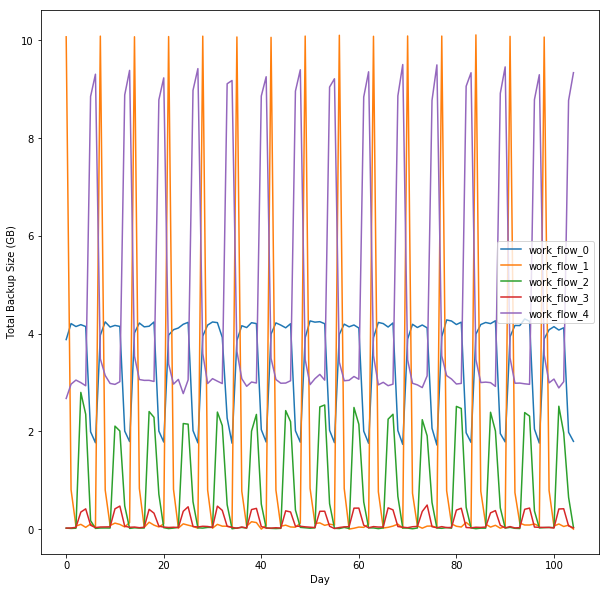

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

df = pd.read_csv('network_backup_dataset.csv')
df.loc[df['Day of Week']== 'Monday','Day of Week'] = 1
df.loc[df['Day of Week']== 'Tuesday','Day of Week'] = 2
df.loc[df['Day of Week']== 'Wednesday','Day of Week'] = 3
df.loc[df['Day of Week']== 'Thursday','Day of Week'] = 4
df.loc[df['Day of Week']== 'Friday','Day of Week'] = 5
df.loc[df['Day of Week']== 'Saturday','Day of Week'] = 6
df.loc[df['Day of Week']== 'Sunday','Day of Week'] = 7
for i in range(5):
    df_temp = df[df['Work-Flow-ID'] == 'work_flow_' + str(i)]
    group = df_temp.groupby(['Week #', 'Day of Week']).agg({'Size of Backup (GB)': np.sum})
    plt.plot(group.values)
    plt.xlabel('Day')
    plt.ylabel('Total Backup Size (GB)')

plt.legend(labels = ['work_flow_' + str(i) for i in range(5)])

#### (c)
Can you identify any repeating patterns?

The answer is shown in the report

### 2

#### (a)
Fit a linear regression model. We use ordinary least square as the penalty function. $$\min \limits_{\beta} ||Y-X\beta||^2 $$ where the minimization is on the coeﬃcient vector $\beta$. 

Convert each categorical feature into one dimensional numerical values using scalar encoding (e.g. Monday to Sunday can be mapped to 1-7), and then directly use them to ﬁt a basic linear regression model. 

In [10]:
def getScalarData():
    df = pd.read_csv('network_backup_dataset.csv')
    df.loc[df['Day of Week']== 'Monday','Day of Week'] = 1
    df.loc[df['Day of Week']== 'Tuesday','Day of Week'] = 2
    df.loc[df['Day of Week']== 'Wednesday','Day of Week'] = 3
    df.loc[df['Day of Week']== 'Thursday','Day of Week'] = 4
    df.loc[df['Day of Week']== 'Friday','Day of Week'] = 5
    df.loc[df['Day of Week']== 'Saturday','Day of Week'] = 6
    df.loc[df['Day of Week']== 'Sunday','Day of Week'] = 7
    X = df.iloc[ : , 0 : 5].values
    y = df.iloc[ : ,5].values
    for i in range(X.shape[0]):
        X[i, 3] = int(X[i, 3].split('_')[-1])
        X[i, 4] = int(X[i, 4].split('_')[-1])
    return X, y

In [195]:
def plotFitVSTrue(y_predict, y_true):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 10))
    plt.scatter(y_true, y_predict)
    plt.xlabel('True Values')
    plt.ylabel('Fitted Values')

In [196]:
def plotFitVSResudal(y_predict, y_true):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 10))
    plt.scatter(y_predict, y_true - y_predict)
    plt.xlabel('Fitted Values')
    plt.ylabel('Residual Values')

In [197]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import KFold

X, y = getScalarData()
kf = KFold(n_splits = 10, shuffle = False)
kf.get_n_splits(X)
i = 1
total_train_RMSE = 0.0
total_test_RMSE = 0.0
for train, test in kf.split(X):
    X_train, y_train = X[train, : ], y[train]
    X_test, y_test = X[test, : ], y[test]
    lr = linear_model.LinearRegression()
    lr.fit(X_train, y_train)
    
    prediction_train = lr.predict(X_train)
    prediction_test = lr.predict(X_test)
    
    train_RMSE = np.sqrt(metrics.mean_squared_error(prediction_train, y_train))
    test_RMSE = np.sqrt(metrics.mean_squared_error(prediction_test, y_test))
    
    total_train_RMSE = total_train_RMSE + train_RMSE
    total_test_RMSE = total_test_RMSE + test_RMSE
    
    print('The', i,'th folder\'s result:')
    i = i + 1
    print('  Training RMSE', train_RMSE)
    print('  Test RMSE', test_RMSE)

print()
print('Average Training RMSE', total_train_RMSE / 10.0)
print('Average Test RMSE', total_test_RMSE / 10.0)

The 1 th folder's result:
  Training RMSE 0.10324315757540427
  Test RMSE 0.10671805207226827
The 2 th folder's result:
  Training RMSE 0.10396677791654478
  Test RMSE 0.1001846143863141
The 3 th folder's result:
  Training RMSE 0.10322579905879994
  Test RMSE 0.106849773893365
The 4 th folder's result:
  Training RMSE 0.1039464291963174
  Test RMSE 0.10036709167781363
The 5 th folder's result:
  Training RMSE 0.10319511299798963
  Test RMSE 0.10711585431838347
The 6 th folder's result:
  Training RMSE 0.10393838251390547
  Test RMSE 0.10044533654683797
The 7 th folder's result:
  Training RMSE 0.10320263162336227
  Test RMSE 0.10705026882029615
The 8 th folder's result:
  Training RMSE 0.10393638595896813
  Test RMSE 0.1004666455097133
The 9 th folder's result:
  Training RMSE 0.10320098997274792
  Test RMSE 0.10707418586815101
The 10 th folder's result:
  Training RMSE 0.10399160058862011
  Test RMSE 0.09994712086112156

Average Training RMSE 0.103584726740266
Average Test RMSE 0.103

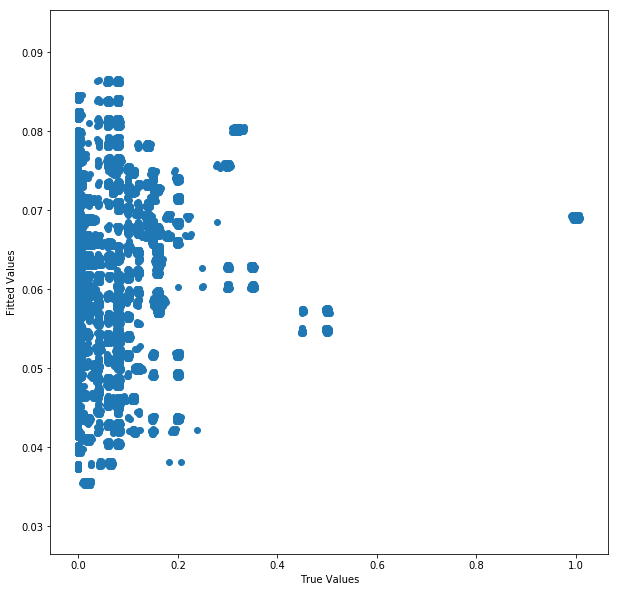

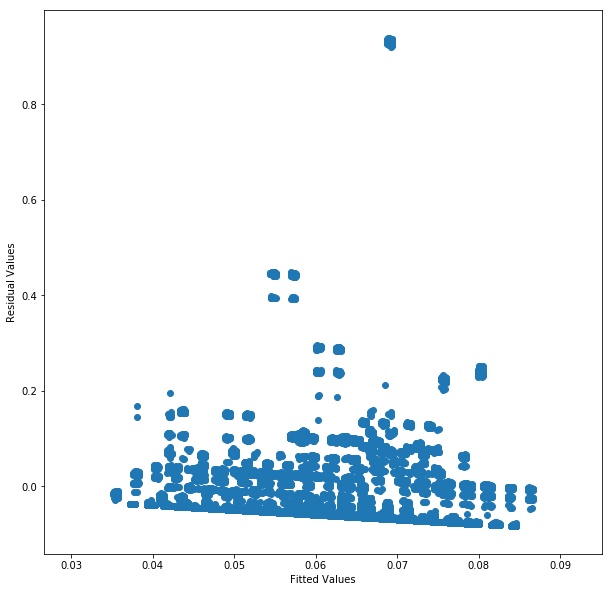

In [198]:
y_whole_predict = lr.predict(X)
plotFitVSTrue(y_whole_predict, y)
plotFitVSResudal(y_whole_predict, y)

#### (b)
Use a random forest regression model for the same task. 

Feature importance in random forest algorithm: during the training process, for each node, a branching decision is made based on only one feature that minimized a chosen measure of impurity. For classiﬁcation, it is typically Gini impurity or information gain (entropy) and for regression task, it is variance (see lecture notes). The importance of each feature will be the averaged decreased variance for each node split with this feature in the forest and weighted by the number of samples it splits. 

Out of bag error: In the random forest regression, since we use bootstrapping, it’s easier and faster to evaluate the generalization ability. Each tree is only built from a subset of the data set (because of sampling) so the data points that are left out can be used as the test set. One can then deﬁne predictionRMSE for each tree and then average over all trees. In a sklearn’s random forest regression object, oob score will return out-of-bag R2 score, so you can calculate 1−oob score as the out of bag error. 

Set the parameters of your model with the following initial values. 

• Number of trees: 20  <br />
• Depth of each tree: 4  <br />
• Bootstrap: True  <br />
• Maximum number of features: 5

Note that a Random Forest model can handle categorical variables without the need of one-hot or scalar encoding. 

##### (i)
Report Training and average Test RMSE from 10 fold cross validation (sum up each fold’s square error, divide by total number of data then take square root) and Out Of Bag error you get from this initial model. 

In [199]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import KFold

X, y = getScalarData()
kf = KFold(n_splits = 10, shuffle = False)
kf.get_n_splits(X)
i = 1
total_train_RMSE = 0.0
total_test_RMSE = 0.0
total_OOB_score = 0.0
for train, test in kf.split(X):
    X_train, y_train = X[train, : ], y[train]
    X_test, y_test = X[test, : ], y[test]
    rf = RandomForestRegressor(n_estimators = 20, max_depth = 4, bootstrap = True, max_features = 5, oob_score = True)
    rf.fit(X_train, y_train)
    
    prediction_train = rf.predict(X_train)
    prediction_test = rf.predict(X_test)
    
    train_RMSE = np.sqrt(metrics.mean_squared_error(prediction_train, y_train))
    test_RMSE = np.sqrt(metrics.mean_squared_error(prediction_test, y_test))
    
    total_train_RMSE = total_train_RMSE + train_RMSE
    total_test_RMSE = total_test_RMSE + test_RMSE
    total_OOB_score = total_OOB_score + 1 - rf.oob_score_
    
    print('The', i,'th folder\'s result:')
    i = i + 1
    print('  Training RMSE', train_RMSE)
    print('  Test RMSE', test_RMSE)
    print('  OOB Score is ', 1 - rf.oob_score_)
    
print()
print('Average Training RMSE', total_train_RMSE / 10.0)
print('Average Test RMSE', total_test_RMSE / 10.0)
print('Average OOB Score', total_OOB_score / 10)

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


The 1 th folder's result:
  Training RMSE 0.060043237996584606
  Test RMSE 0.06753435804515043
  OOB Score is  0.33661438962017687
The 2 th folder's result:
  Training RMSE 0.06098979666828334
  Test RMSE 0.052642312208321766
  OOB Score is  0.3430042751266632


/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


The 3 th folder's result:
  Training RMSE 0.06014906845979314
  Test RMSE 0.06746388163650116
  OOB Score is  0.33717970356629845
The 4 th folder's result:
  Training RMSE 0.06025253151315251
  Test RMSE 0.052210054490927395
  OOB Score is  0.33926224054517706


/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


The 5 th folder's result:
  Training RMSE 0.059058420532384526
  Test RMSE 0.06613977892299219
  OOB Score is  0.3304684448869377
The 6 th folder's result:
  Training RMSE 0.06075674247613823
  Test RMSE 0.0537913838337751
  OOB Score is  0.34252298589236385


/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


The 7 th folder's result:
  Training RMSE 0.060116527001278446
  Test RMSE 0.06772914688644172
  OOB Score is  0.33680501166988885
The 8 th folder's result:
  Training RMSE 0.06100776608281727
  Test RMSE 0.052535077266072504
  OOB Score is  0.34390807723279826
The 9 th folder's result:
  Training RMSE 0.06015660036261118
  Test RMSE 0.06739739918871152
  OOB Score is  0.3373206310266046
The 10 th folder's result:
  Training RMSE 0.061589518516017884
  Test RMSE 0.05342279023184768
  OOB Score is  0.34838194070203354

Average Training RMSE 0.06041202096090612
Average Test RMSE 0.060086618271074144
Average OOB Score 0.3395467700268943


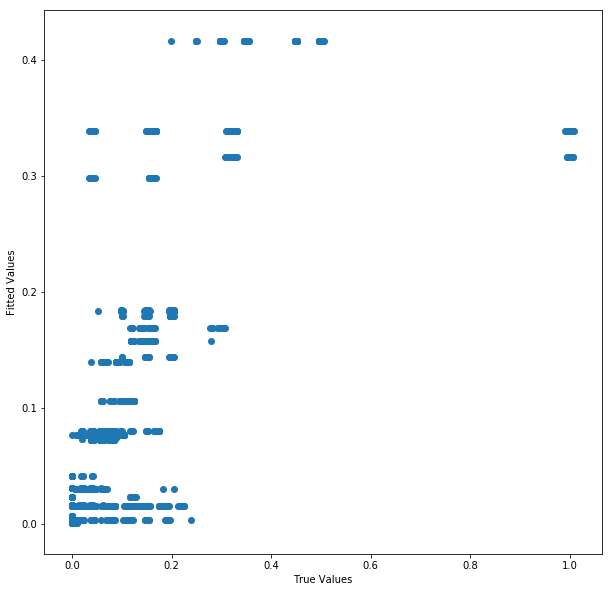

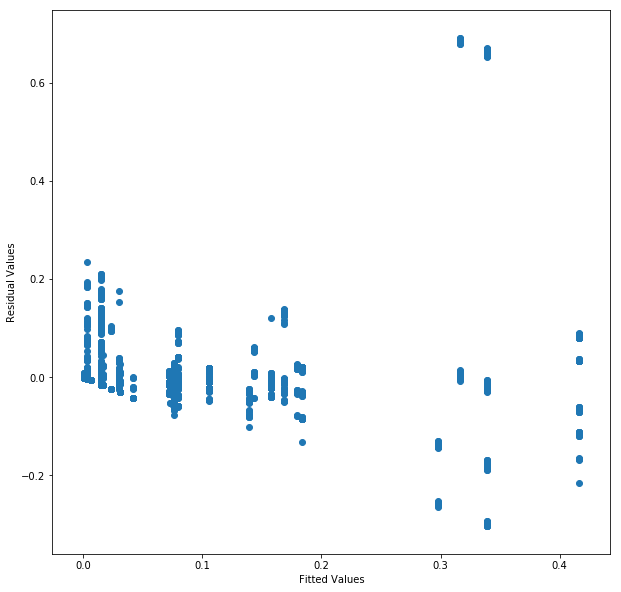

In [200]:
y_whole_predict = rf.predict(X)
plotFitVSTrue(y_whole_predict, y)
plotFitVSResudal(y_whole_predict, y)

##### (ii)
Sweep over number of trees from 1 to 200 and maximum number of features from 1 to 5, plot 

(1) out-of-bag error (y axis) against number of trees (x axis) <br />
(2) average test-RMSE (y axis) against number of trees (x axis) 

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import KFold

X, y = getScalarData()

test_RMSE_list = [[], [], [], [], []]
oob_score_list = [[], [], [], [], []]

for feature in range(0, 5):
    for tree in range(1, 200, 4):
        kf = KFold(n_splits = 10, shuffle = False)
        kf.get_n_splits(X)
        total_test_RMSE = 0.0
        total_OOB_score = 0.0
        for train, test in kf.split(X):
            X_train, y_train = X[train, : ], y[train]
            X_test, y_test = X[test, : ], y[test]
            rf = RandomForestRegressor(n_estimators = tree, max_depth = 4, bootstrap = True, max_features = feature + 1, oob_score = True)
            rf.fit(X_train, y_train)

            prediction_test = rf.predict(X_test)

            test_RMSE = np.sqrt(metrics.mean_squared_error(prediction_test, y_test))

            total_test_RMSE = total_test_RMSE + test_RMSE
            total_OOB_score = total_OOB_score + 1 - rf.oob_score_
        
        test_RMSE_list[feature].append(total_test_RMSE / 10)
        oob_score_list[feature].append(total_OOB_score / 10)

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

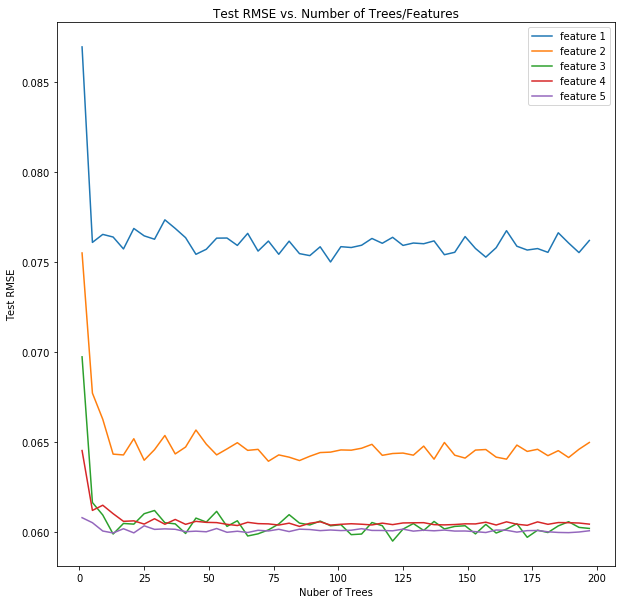

In [77]:
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.plot(range(1, 200, 4), test_RMSE_list[i])
    plt.title('Test RMSE vs. Number of Trees/Features')
    plt.xlabel('Nuber of Trees')
    plt.ylabel('Test RMSE')
plt.legend(labels = ['feature ' + str(i + 1) for i in range(5)])

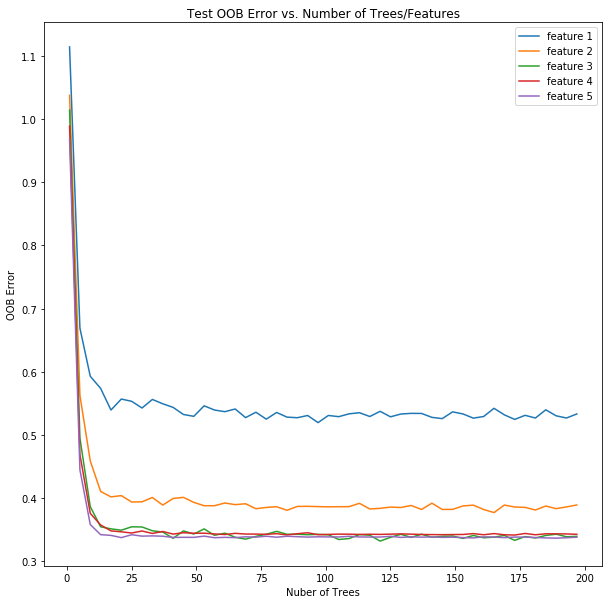

In [78]:
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.plot(range(1, 200, 4), oob_score_list[i])
    plt.title('Test OOB Error vs. Number of Trees/Features')
    plt.xlabel('Nuber of Trees')
    plt.ylabel('OOB Error')
plt.legend(labels = ['feature ' + str(i + 1) for i in range(5)])

##### (iii)
Pick another parameter you want to experiment on. Plot similar ﬁgure 1 and ﬁgure 2 as above. What parameters would you pick to achieve the best performance?

In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import KFold

X, y = getScalarData()

test_RMSE_list = [[], [], [], [], []]
oob_score_list = [[], [], [], [], []]

for feature in range(0, 5):
    for depth in range(1, 200, 4):
        kf = KFold(n_splits = 10, shuffle = False)
        kf.get_n_splits(X)
        total_test_RMSE = 0.0
        total_OOB_score = 0.0
        for train, test in kf.split(X):
            X_train, y_train = X[train, : ], y[train]
            X_test, y_test = X[test, : ], y[test]
            rf = RandomForestRegressor(n_estimators = 16, max_depth = depth, bootstrap = True, max_features = feature + 1, oob_score = True)
            rf.fit(X_train, y_train)

            prediction_test = rf.predict(X_test)

            test_RMSE = np.sqrt(metrics.mean_squared_error(prediction_test, y_test))

            total_test_RMSE = total_test_RMSE + test_RMSE
            total_OOB_score = total_OOB_score + 1 - rf.oob_score_
        
        test_RMSE_list[feature].append(total_test_RMSE / 10)
        oob_score_list[feature].append(total_OOB_score / 10)

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

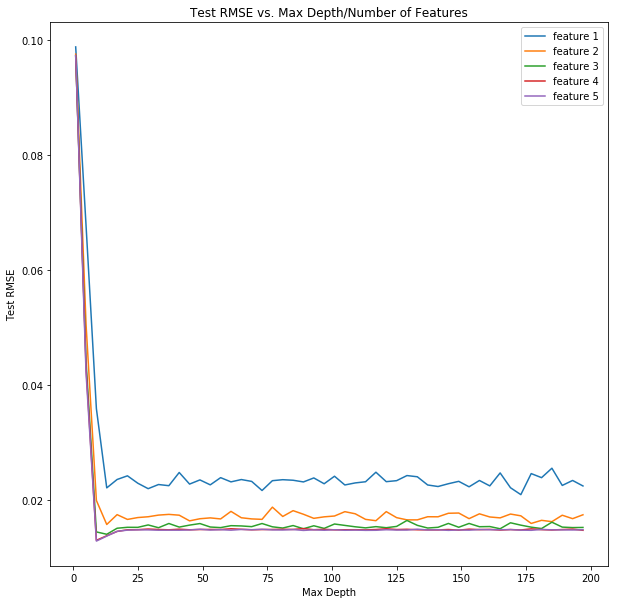

In [83]:
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.plot(range(1, 200, 4), test_RMSE_list[i])
    plt.title('Test RMSE vs. Max Depth/Number of Features')
    plt.xlabel('Max Depth')
    plt.ylabel('Test RMSE')
plt.legend(labels = ['feature ' + str(i + 1) for i in range(5)])

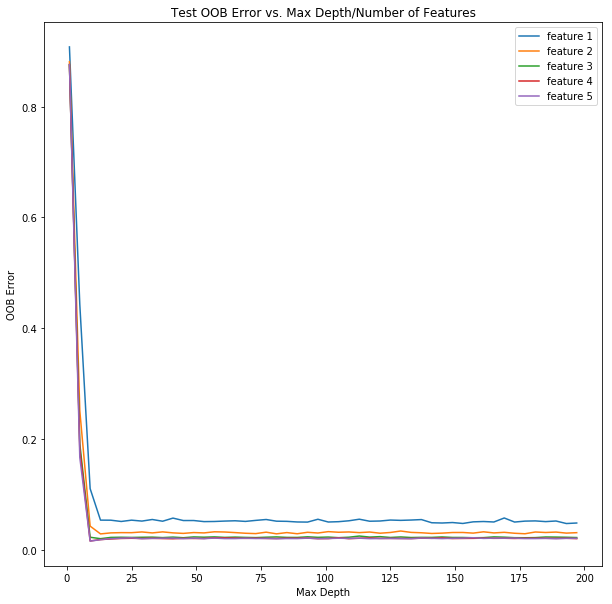

In [84]:
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.plot(range(1, 200, 4), oob_score_list[i])
    plt.title('Test OOB Error vs. Max Depth/Number of Features')
    plt.xlabel('Max Depth')
    plt.ylabel('OOB Error')
plt.legend(labels = ['feature ' + str(i + 1) for i in range(5)])

##### (iv)
Report the feature importances you got from the best random forest regression you ﬁnd. 

In [201]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import KFold

X, y = getScalarData()

rf = RandomForestRegressor(n_estimators = 16, max_depth = 9, bootstrap = True, max_features = 5, oob_score = True)
rf.fit(X, y)
print('Week #,', 'Day of Week,', 'Backup Start Time - Hour of Day,', 'Work-Flow-ID,', 'File Name')
print(rf.feature_importances_)

Week #, Day of Week, Backup Start Time - Hour of Day, Work-Flow-ID, File Name
[0.00162779 0.19567422 0.39740765 0.18825149 0.21703885]


/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [202]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import KFold

X, y = getScalarData()
kf = KFold(n_splits = 10, shuffle = False)
kf.get_n_splits(X)
i = 1
total_train_RMSE = 0.0
total_test_RMSE = 0.0
total_OOB_score = 0.0
for train, test in kf.split(X):
    X_train, y_train = X[train, : ], y[train]
    X_test, y_test = X[test, : ], y[test]
    rf = RandomForestRegressor(n_estimators = 16, max_depth = 9, bootstrap = True, max_features = 5, oob_score = True)
    rf.fit(X_train, y_train)
    
    prediction_train = rf.predict(X_train)
    prediction_test = rf.predict(X_test)
    
    train_RMSE = np.sqrt(metrics.mean_squared_error(prediction_train, y_train))
    test_RMSE = np.sqrt(metrics.mean_squared_error(prediction_test, y_test))
    
    total_train_RMSE = total_train_RMSE + train_RMSE
    total_test_RMSE = total_test_RMSE + test_RMSE
    total_OOB_score = total_OOB_score + 1 - rf.oob_score_
    
    print('The', i,'th folder\'s result:')
    i = i + 1
    print('  Training RMSE', train_RMSE)
    print('  Test RMSE', test_RMSE)
    print('  OOB Score is ', 1 - rf.oob_score_)
    
print()
print('Average Training RMSE', total_train_RMSE / 10.0)
print('Average Test RMSE', total_test_RMSE / 10.0)
print('Average OOB Score', total_OOB_score / 10)

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


The 1 th folder's result:
  Training RMSE 0.011700903477507582
  Test RMSE 0.014537774139793694
  OOB Score is  0.016057156107683546
The 2 th folder's result:
  Training RMSE 0.011491192997513326
  Test RMSE 0.013567052338520852
  OOB Score is  0.016104473799036234


/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


The 3 th folder's result:
  Training RMSE 0.011700520586478209
  Test RMSE 0.01096051446112786
  OOB Score is  0.016220178449135925
The 4 th folder's result:
  Training RMSE 0.011336577914469155
  Test RMSE 0.014803386408233091
  OOB Score is  0.014416100010317123


/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


The 5 th folder's result:
  Training RMSE 0.011767381789218273
  Test RMSE 0.010953123193656373
  OOB Score is  0.016088253240735706
The 6 th folder's result:
  Training RMSE 0.011341623685312245
  Test RMSE 0.01460412370072281
  OOB Score is  0.01488591634422165


/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


The 7 th folder's result:
  Training RMSE 0.011666352514419758
  Test RMSE 0.011728484487566112
  OOB Score is  0.01591786672156048
The 8 th folder's result:
  Training RMSE 0.01153017113811526
  Test RMSE 0.013215288288541628
  OOB Score is  0.015136892856013273


/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


The 9 th folder's result:
  Training RMSE 0.011736013605337268
  Test RMSE 0.01118001776780333
  OOB Score is  0.016289273003480487
The 10 th folder's result:
  Training RMSE 0.011516628551683662
  Test RMSE 0.013389160597164261
  OOB Score is  0.015476876859847555

Average Training RMSE 0.011578736626005472
Average Test RMSE 0.012893892538313
Average OOB Score 0.015659298739203232


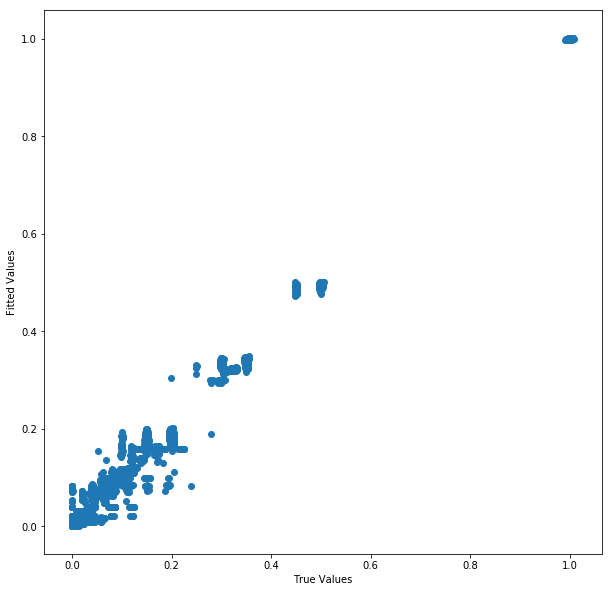

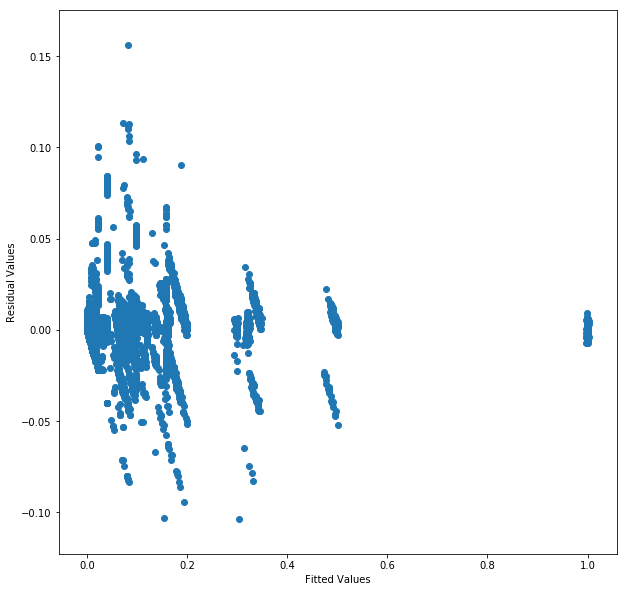

In [203]:
y_whole_predict = rf.predict(X)
plotFitVSTrue(y_whole_predict, y)
plotFitVSResudal(y_whole_predict, y)

##### (v)
Visualize your decision trees. Pick any tree (estimator) in best random forest (with max depth=4) and plot its structure, which is the root node in this decision tree? Is it the most important feature according to the feature importance reported by the regressor? 

In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.tree import export_graphviz
import graphviz 

X, y = getScalarData()

rf = RandomForestRegressor(n_estimators = 16, max_depth = 4, bootstrap = True, max_features = 5, oob_score = True)
rf.fit(X, y)
data = export_graphviz(rf.estimators_[0],
                feature_names = ['Week #,', 'Day of Week,', 'Backup Start Time - Hour of Day,', 'Work-Flow-ID,', 'File Name'],
                filled = True,
                rounded = True)

graph = graphviz.Source(data)  
graph.view()

/home/evanshu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


'Source.gv.pdf'

#### (c)
Now use a neural network regression model (one hidden layer) with all features one-hot encoded. 
 
Parameters:<br />
• Number of hidden units. Try [2,5,10,50,100,150,200,...,600].<br />
• Activation function (‘relu’, ‘logistic’, ‘tanh’) 

Plot test-RMSE vs the number of hidden units for each activation function. Report the best combination. 

In [123]:
def categoriesProcess(attribute, data):
    df = data[attribute]
    keys = set()
    for i in range(df.shape[0]):
        keys.add(df[i])
    
    output_df = pd.DataFrame(np.zeros((df.shape[0], len(keys))), columns=[attribute + "_" + str(s1) for s1 in keys])

    for i in range(df.shape[0]):
        output_df[attribute + "_" + str(df[i])][i] = 1
    return output_df

def getOneHotEncoding():
    df = pd.read_csv('network_backup_dataset.csv')
    categories_columns = ['Week #', 'Day of Week', 'Backup Start Time - Hour of Day', 'Work-Flow-ID', 'File Name']
    for column in categories_columns:
        output_df = categoriesProcess(column, df)
        df.drop(column, axis = 1, inplace = True)
        df = pd.concat([df, output_df], axis = 1)
    
    df.drop('Backup Time (hour)', axis = 1, inplace = True)
    
    y = df['Size of Backup (GB)'].values
    df.drop('Size of Backup (GB)', axis = 1, inplace = True)
    
    X = df.values
    return X, y

##### RELU

In [129]:
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.model_selection import KFold

time_list = [2, 5, 10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]

X, y = getOneHotEncoding()
kf = KFold(n_splits = 10, shuffle = False)
kf.get_n_splits(X)

test_RMSE_relu = list()
for layer_num in time_list:
    print(layer_num, end = ' ')
    total_test_RMSE = 0.0
    for train, test in kf.split(X):
        X_train, y_train = X[train, : ], y[train]
        X_test, y_test = X[test, : ], y[test]
        
        nl_relu = MLPRegressor(hidden_layer_sizes = layer_num, activation='relu')
        nl_relu.fit(X_train, y_train)

        prediction_test = nl_relu.predict(X_test)

        test_RMSE = np.sqrt(metrics.mean_squared_error(prediction_test, y_test))

        total_test_RMSE = total_test_RMSE + test_RMSE

    test_RMSE_relu.append(total_test_RMSE / 10)

(18588, 63)
2 5 10 50 100 150 200 250 300 350 400 450 500 550 600 

In [127]:
print(test_RMSE_relu)

[0.1077933348637982, 0.08611442493791419, 0.06931534785145614, 0.04760545330206288]


##### Logistic

In [130]:
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.model_selection import KFold

time_list = [2, 5, 10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]

X, y = getOneHotEncoding()
kf = KFold(n_splits = 10, shuffle = False)
kf.get_n_splits(X)

test_RMSE_logistic = list()
for layer_num in time_list:
    print(layer_num, end = ' ')
    total_test_RMSE = 0.0
    for train, test in kf.split(X):
        X_train, y_train = X[train, : ], y[train]
        X_test, y_test = X[test, : ], y[test]
        
        nl_logistic = MLPRegressor(hidden_layer_sizes = layer_num, activation='logistic')
        nl_logistic.fit(X_train, y_train)

        prediction_test = nl_logistic.predict(X_test)

        test_RMSE = np.sqrt(metrics.mean_squared_error(prediction_test, y_test))

        total_test_RMSE = total_test_RMSE + test_RMSE

    test_RMSE_logistic.append(total_test_RMSE / 10)

(18588, 63)
2 5 10 50 100 150 200 250 300 350 400 450 500 550 600 

##### Tanh

In [133]:
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.model_selection import KFold

time_list = [2, 5, 10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]

X, y = getOneHotEncoding()
kf = KFold(n_splits = 10, shuffle = False)
kf.get_n_splits(X)

test_RMSE_tanh = list()
for layer_num in time_list:
    print(layer_num, end = ' ')
    total_test_RMSE = 0.0
    for train, test in kf.split(X):
        X_train, y_train = X[train, : ], y[train]
        X_test, y_test = X[test, : ], y[test]
        
        nl_tanh = MLPRegressor(hidden_layer_sizes = layer_num, activation='tanh')
        nl_tanh.fit(X_train, y_train)

        prediction_test = nl_tanh.predict(X_test)

        test_RMSE = np.sqrt(metrics.mean_squared_error(prediction_test, y_test))

        total_test_RMSE = total_test_RMSE + test_RMSE

    test_RMSE_tanh.append(total_test_RMSE / 10)

(18588, 63)
2 5 10 50 100 150 200 250 300 350 400 450 500 550 600 

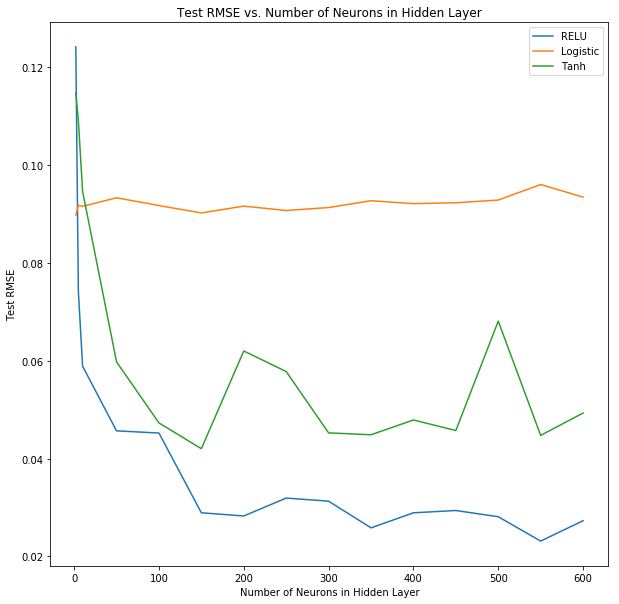

In [137]:
plt.figure(figsize=(10, 10))
plt.plot(time_list, test_RMSE_relu)
plt.plot(time_list, test_RMSE_logistic)
plt.plot(time_list, test_RMSE_tanh)
plt.title('Test RMSE vs. Number of Neurons in Hidden Layer')
plt.xlabel('Number of Neurons in Hidden Layer')
plt.ylabel('Test RMSE')
plt.legend(labels = ['RELU', 'Logistic', 'Tanh'])

##### Best Parameter (RELU with number of neurons in hidder layer = 550)

In [204]:
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.model_selection import KFold

X, y = getOneHotEncoding()
kf = KFold(n_splits = 10, shuffle = False)
kf.get_n_splits(X)

total_train_RMSE = 0.0
total_test_RMSE = 0.0
i = 1
for train, test in kf.split(X):
    X_train, y_train = X[train, : ], y[train]
    X_test, y_test = X[test, : ], y[test]
    nl_best = MLPRegressor(hidden_layer_sizes = 550, activation='relu')
    nl_best.fit(X_train, y_train)
    
    prediction_train = nl_best.predict(X_train)
    prediction_test = nl_best.predict(X_test)
    
    train_RMSE = np.sqrt(metrics.mean_squared_error(prediction_train, y_train))
    test_RMSE = np.sqrt(metrics.mean_squared_error(prediction_test, y_test))
    
    total_train_RMSE = total_train_RMSE + train_RMSE
    total_test_RMSE = total_test_RMSE + test_RMSE
    
    print('The', i,'th folder\'s result:')
    print('  Training RMSE', train_RMSE)
    print('  Test RMSE', test_RMSE)
    i = i + 1
    
print()
print('Average Training RMSE', total_train_RMSE / 10.0)
print('Average Test RMSE', total_test_RMSE / 10.0)

(18588, 63)
The 1 th folder's result:
  Training RMSE 0.011167059262462507
  Test RMSE 0.025500925137672922
The 2 th folder's result:
  Training RMSE 0.011607388271006325
  Test RMSE 0.027950666465378034
The 3 th folder's result:
  Training RMSE 0.011917268940860402
  Test RMSE 0.022071036811383803
The 4 th folder's result:
  Training RMSE 0.011107013767609485
  Test RMSE 0.028159227459831734
The 5 th folder's result:
  Training RMSE 0.013261953858768617
  Test RMSE 0.024498564386126714
The 6 th folder's result:
  Training RMSE 0.011525470191661523
  Test RMSE 0.022778928956129034
The 7 th folder's result:
  Training RMSE 0.013075848411296177
  Test RMSE 0.02144481867359288
The 8 th folder's result:
  Training RMSE 0.011484893636200692
  Test RMSE 0.025263129511203783
The 9 th folder's result:
  Training RMSE 0.011920257028047701
  Test RMSE 0.02320829006879411
The 10 th folder's result:
  Training RMSE 0.012075930590208128
  Test RMSE 0.025838239446148072

Average Training RMSE 0.0119

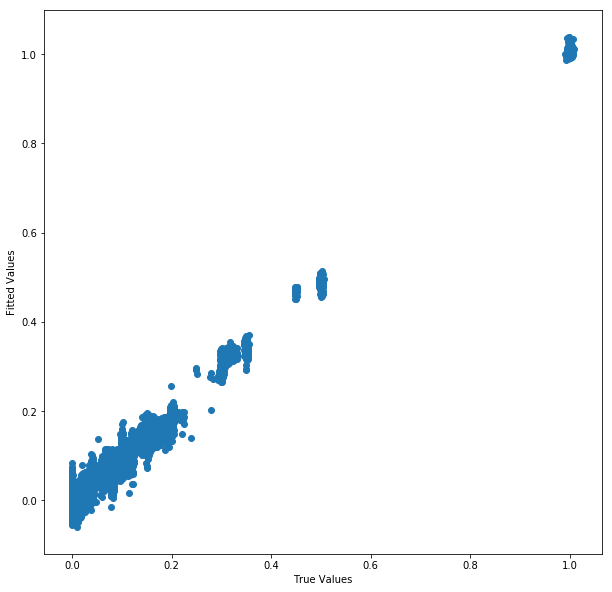

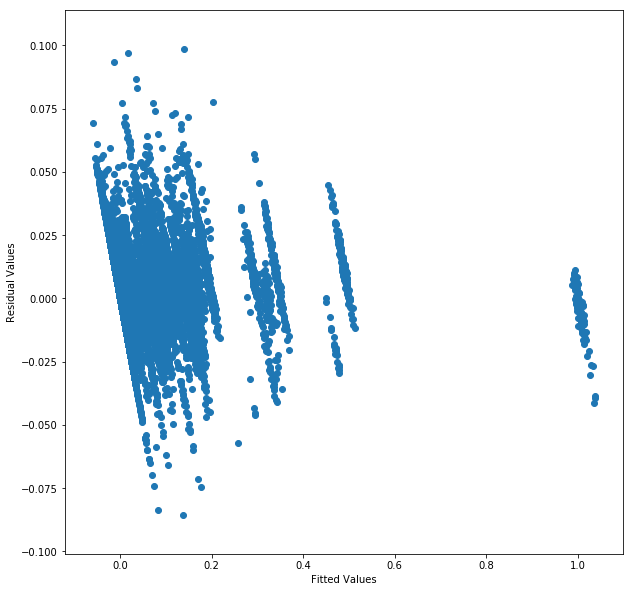

In [205]:
y_whole_predict = nl_best.predict(X)
plotFitVSTrue(y_whole_predict, y)
plotFitVSResudal(y_whole_predict, y)

#### (d)
Predict the Backup size for each of the workﬂows separately.

##### (i)
Using linear regression model. Explain if the ﬁt is improved? 

In [206]:
def getScalarDataFile(work_flow):
    df = pd.read_csv('network_backup_dataset.csv')
    df.loc[df['Day of Week']== 'Monday','Day of Week'] = 1
    df.loc[df['Day of Week']== 'Tuesday','Day of Week'] = 2
    df.loc[df['Day of Week']== 'Wednesday','Day of Week'] = 3
    df.loc[df['Day of Week']== 'Thursday','Day of Week'] = 4
    df.loc[df['Day of Week']== 'Friday','Day of Week'] = 5
    df.loc[df['Day of Week']== 'Saturday','Day of Week'] = 6
    df.loc[df['Day of Week']== 'Sunday','Day of Week'] = 7
    df = df.loc[df['Work-Flow-ID'] == 'work_flow_' + str(work_flow)]
    X = df.iloc[ : , [0, 1, 2, 4]].values
    y = df.iloc[ : ,5].values
    for i in range(X.shape[0]):
        X[i, 3] = int(X[i, 3].split('_')[-1])
    return X, y

In [211]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import KFold

train_RMSE_workflow = list()
test_RMSE_workflow = list()

y_true_list = list()
y_predicted_list = list()
weight = list()

for i in range(5):
    X, y = getScalarDataFile(i)
    weight.append(X.shape[0])
    
    kf = KFold(n_splits = 10, shuffle = False)
    kf.get_n_splits(X)

    total_train_RMSE = 0.0
    total_test_RMSE = 0.0
    
    lr = linear_model.LinearRegression()
    
    for train, test in kf.split(X):
        X_train, y_train = X[train, : ], y[train]
        X_test, y_test = X[test, : ], y[test]
        lr = linear_model.LinearRegression()
        lr.fit(X_train, y_train)

        prediction_train = lr.predict(X_train)
        prediction_test = lr.predict(X_test)

        train_RMSE = np.sqrt(metrics.mean_squared_error(prediction_train, y_train))
        test_RMSE = np.sqrt(metrics.mean_squared_error(prediction_test, y_test))

        total_train_RMSE = total_train_RMSE + train_RMSE
        total_test_RMSE = total_test_RMSE + test_RMSE
    
    y_true_list.append(y)
    y_predicted_list.append(lr.predict(X))
    print('The RMSE for workfolow', i + 1)
    print('   Train RMSE', total_train_RMSE / 10.0)
    print('   Test RMSE', total_test_RMSE / 10.0)
    train_RMSE_workflow.append(total_train_RMSE / 10.0)
    test_RMSE_workflow.append(total_test_RMSE / 10.0)

The RMSE for workfolow 1
   Train RMSE 0.035835233633998875
   Test RMSE 0.03586346655296642
The RMSE for workfolow 2
   Train RMSE 0.14874414236869582
   Test RMSE 0.14709758822040112
The RMSE for workfolow 3
   Train RMSE 0.04290319403417192
   Test RMSE 0.04257533084504969
The RMSE for workfolow 4
   Train RMSE 0.007242981713369212
   Test RMSE 0.007186683488524774
The RMSE for workfolow 5
   Train RMSE 0.08591402576289187
   Test RMSE 0.08533975477118065


In [212]:
weight_sum = sum(weight)
mean_train_RMSE = 0.0
mean_test_RMSE = 0.0
for i in range(5):
    mean_train_RMSE = mean_train_RMSE + train_RMSE_workflow[i] * weight[i] / weight_sum
    mean_test_RMSE = mean_test_RMSE + test_RMSE_workflow[i] * weight[i] / weight_sum
    
print('Weighted Train RMSE', mean_train_RMSE)
print('Weighted Test RMSE', mean_test_RMSE)

Weighted Train RMSE 0.06349460706251145
Weighted Test RMSE 0.06298709748694042


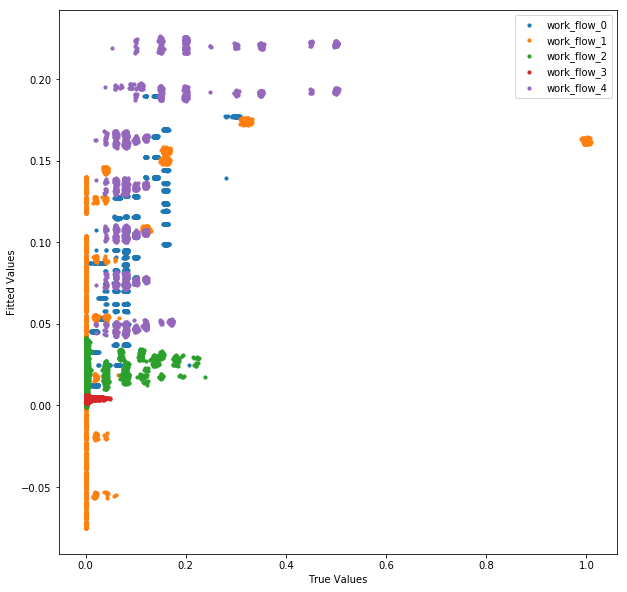

In [220]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(5):
    plt.scatter(y_true_list[i], y_predicted_list[i], s = 10)
plt.xlabel('True Values')
plt.ylabel('Fitted Values')
plt.legend(labels = ['work_flow_' + str(i) for i in range(5)])

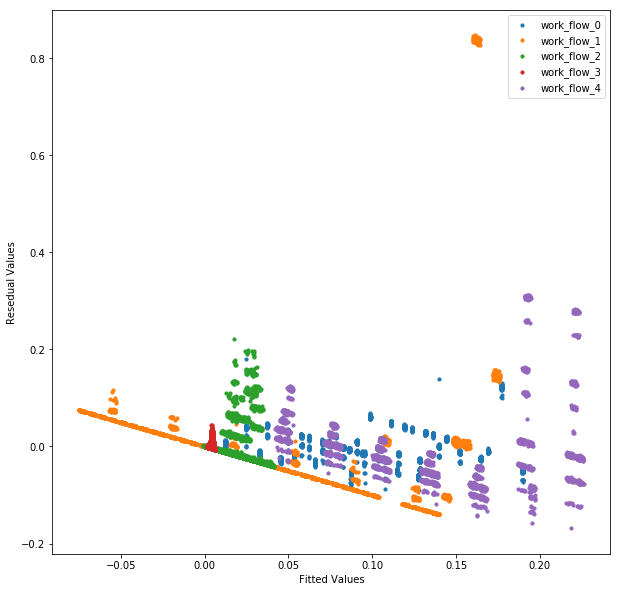

In [221]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(5):
    plt.scatter(y_predicted_list[i], y_true_list[i] - y_predicted_list[i], s = 10)
plt.xlabel('Fitted Values')
plt.ylabel('Resedual Values')
plt.legend(labels = ['work_flow_' + str(i) for i in range(5)])

##### (ii)
Try ﬁtting a more complex regression function to your data. You can try a polynomial function of your variables. Try increasing the degree of the polynomial to improve your ﬁt. Again, use a 10 fold cross validation to evaluate your results. Plot the average train and test RMSE of the trained model against the degree of the polynomial you use. Can you ﬁnd a threshold on the degree of the ﬁtted polynomial beyond which the generalization error of your model gets worse? Can you explain how cross validation helps controlling the complexity of your model? 

In [230]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures

poly_train_RMSE = list()
poly_test_RMSE = list()

for poly_num in range(1, 12):
    poly = PolynomialFeatures(poly_num)
    
    weight = list()
    train_RMSE_workflow = list()
    test_RMSE_workflow = list()
    
    for i in range(5):
        X, y = getScalarDataFile(i)
        weight.append(X.shape[0])
        
        X = poly.fit_transform(X)
        
        kf = KFold(n_splits = 10, shuffle = False)
        kf.get_n_splits(X)

        total_train_RMSE = 0.0
        total_test_RMSE = 0.0

        lr = linear_model.LinearRegression()

        for train, test in kf.split(X):
            X_train, y_train = X[train, : ], y[train]
            X_test, y_test = X[test, : ], y[test]
            lr = linear_model.LinearRegression()
            lr.fit(X_train, y_train)

            prediction_train = lr.predict(X_train)
            prediction_test = lr.predict(X_test)

            train_RMSE = np.sqrt(metrics.mean_squared_error(prediction_train, y_train))
            test_RMSE = np.sqrt(metrics.mean_squared_error(prediction_test, y_test))

            total_train_RMSE = total_train_RMSE + train_RMSE
            total_test_RMSE = total_test_RMSE + test_RMSE

        train_RMSE_workflow.append(total_train_RMSE / 10.0)
        test_RMSE_workflow.append(total_test_RMSE / 10.0)
        
    mean_train_RMSE = 0.0
    mean_test_RMSE = 0.0
    for i in range(5):
        mean_train_RMSE = mean_train_RMSE + train_RMSE_workflow[i] * weight[i] / weight_sum
        mean_test_RMSE = mean_test_RMSE + test_RMSE_workflow[i] * weight[i] / weight_sum
        
    poly_train_RMSE.append(mean_train_RMSE)
    poly_test_RMSE.append(mean_test_RMSE)

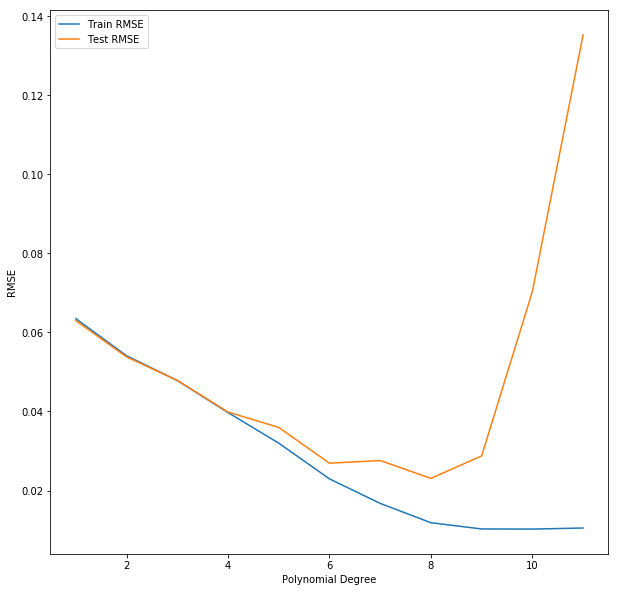

In [234]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.plot(range(1, 12), poly_train_RMSE)
plt.plot(range(1, 12), poly_test_RMSE)
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.legend(labels = ['Train RMSE', 'Test RMSE'])

##### Best

In [240]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures

train_RMSE_workflow = list()
test_RMSE_workflow = list()

y_true_list = list()
y_predicted_list = list()
weight = list()

poly = PolynomialFeatures(8)

for i in range(5):
    X, y = getScalarDataFile(i)
    weight.append(X.shape[0])

    X = poly.fit_transform(X)
    
    kf = KFold(n_splits = 10, shuffle = False)
    kf.get_n_splits(X)

    total_train_RMSE = 0.0
    total_test_RMSE = 0.0
    
    lr = linear_model.LinearRegression()
    
    for train, test in kf.split(X):
        X_train, y_train = X[train, : ], y[train]
        X_test, y_test = X[test, : ], y[test]
        lr = linear_model.LinearRegression()
        lr.fit(X_train, y_train)

        prediction_train = lr.predict(X_train)
        prediction_test = lr.predict(X_test)

        train_RMSE = np.sqrt(metrics.mean_squared_error(prediction_train, y_train))
        test_RMSE = np.sqrt(metrics.mean_squared_error(prediction_test, y_test))

        total_train_RMSE = total_train_RMSE + train_RMSE
        total_test_RMSE = total_test_RMSE + test_RMSE
    
    y_true_list.append(y)
    y_predicted_list.append(lr.predict(X))
    print('The RMSE for workfolow', i + 1)
    print('   Train RMSE', total_train_RMSE / 10.0)
    print('   Test RMSE', total_test_RMSE / 10.0)
    train_RMSE_workflow.append(total_train_RMSE / 10.0)
    test_RMSE_workflow.append(total_test_RMSE / 10.0)

The RMSE for workfolow 1
   Train RMSE 0.007924603263452543
   Test RMSE 0.014238454820523435
The RMSE for workfolow 2
   Train RMSE 0.008073166846162948
   Test RMSE 0.013095668673381727
The RMSE for workfolow 3
   Train RMSE 0.019311495562698094
   Test RMSE 0.03266696731068468
The RMSE for workfolow 4
   Train RMSE 0.004239204258165436
   Test RMSE 0.00834915635097767
The RMSE for workfolow 5
   Train RMSE 0.01951281496075079
   Test RMSE 0.04637969882140139


In [241]:
weight_sum = sum(weight)
mean_train_RMSE = 0.0
mean_test_RMSE = 0.0
for i in range(5):
    mean_train_RMSE = mean_train_RMSE + train_RMSE_workflow[i] * weight[i] / weight_sum
    mean_test_RMSE = mean_test_RMSE + test_RMSE_workflow[i] * weight[i] / weight_sum
    
print('Weighted Train RMSE', mean_train_RMSE)
print('Weighted Test RMSE', mean_test_RMSE)

Weighted Train RMSE 0.011852181537878904
Weighted Test RMSE 0.02306454634217282


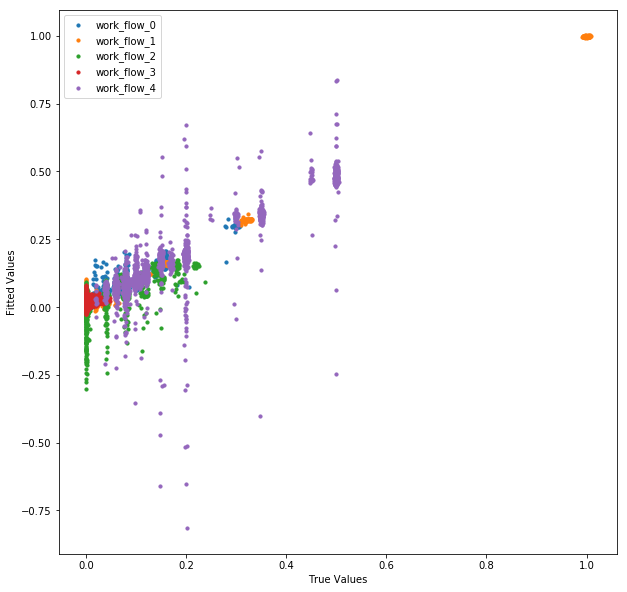

In [242]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(5):
    plt.scatter(y_true_list[i], y_predicted_list[i], s = 10)
plt.xlabel('True Values')
plt.ylabel('Fitted Values')
plt.legend(labels = ['work_flow_' + str(i) for i in range(5)])

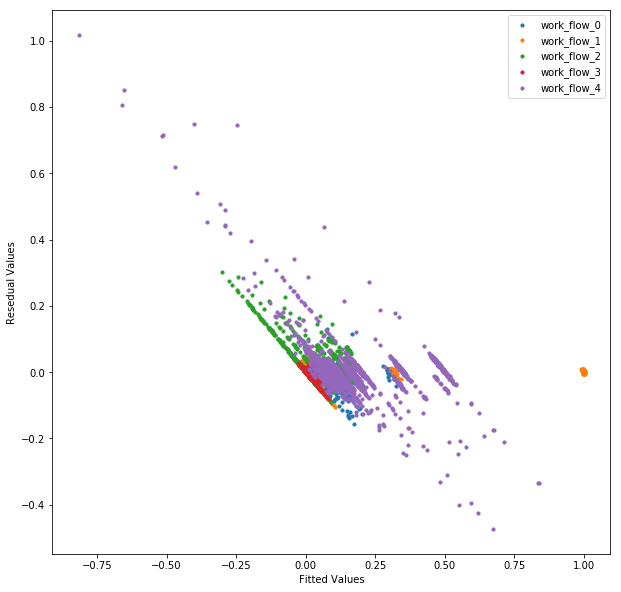

In [243]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(5):
    plt.scatter(y_predicted_list[i], y_true_list[i] - y_predicted_list[i], s = 10)
plt.xlabel('Fitted Values')
plt.ylabel('Resedual Values')
plt.legend(labels = ['work_flow_' + str(i) for i in range(5)])

#### (e)
Use k-nearest neighbor regression and ﬁnd the best parameter.

In [249]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.model_selection import KFold

X, y = getScalarData()
kf = KFold(n_splits = 10, shuffle = False)
kf.get_n_splits(X)

train_RMSE_KNN = list()
test_RMSE_KNN = list()

for k in range(1, 200):
    print(k, end = ' ')
    
    total_train_RMSE = 0.0
    total_test_RMSE = 0.0
    
    for train, test in kf.split(X):
        X_train, y_train = X[train, : ], y[train]
        X_test, y_test = X[test, : ], y[test]
        
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(X_train, y_train)

        prediction_train = knn.predict(X_train)
        prediction_test = knn.predict(X_test)

        train_RMSE = np.sqrt(metrics.mean_squared_error(prediction_train, y_train))
        test_RMSE = np.sqrt(metrics.mean_squared_error(prediction_test, y_test))

        total_train_RMSE = total_train_RMSE + train_RMSE
        total_test_RMSE = total_test_RMSE + test_RMSE

    train_RMSE_KNN.append(total_train_RMSE / 10)
    test_RMSE_KNN.append(total_test_RMSE / 10)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 

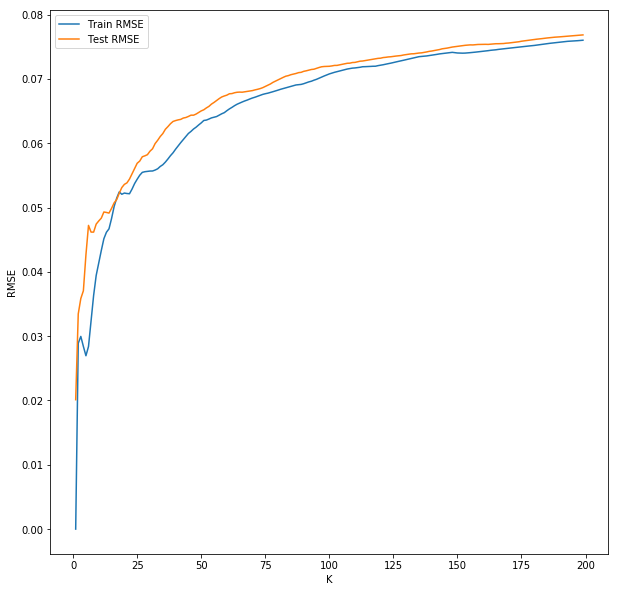

In [251]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.plot(range(1, 200), train_RMSE_KNN)
plt.plot(range(1, 200), test_RMSE_KNN)
plt.xlabel('K')
plt.ylabel('RMSE')
plt.legend(labels = ['Train RMSE', 'Test RMSE'])

In [252]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.model_selection import KFold

X, y = getScalarData()
kf = KFold(n_splits = 10, shuffle = False)
kf.get_n_splits(X)

total_train_RMSE = 0.0
total_test_RMSE = 0.0
i = 1
for train, test in kf.split(X):
    X_train, y_train = X[train, : ], y[train]
    X_test, y_test = X[test, : ], y[test]
    
    knn = KNeighborsRegressor(n_neighbors = 1)
    knn.fit(X_train, y_train)
    
    prediction_train = knn.predict(X_train)
    prediction_test = knn.predict(X_test)
    
    train_RMSE = np.sqrt(metrics.mean_squared_error(prediction_train, y_train))
    test_RMSE = np.sqrt(metrics.mean_squared_error(prediction_test, y_test))
    
    total_train_RMSE = total_train_RMSE + train_RMSE
    total_test_RMSE = total_test_RMSE + test_RMSE
    
    print('The', i,'th folder\'s result:')
    print('  Training RMSE', train_RMSE)
    print('  Test RMSE', test_RMSE)
    i = i + 1
    
print()
print('Average Training RMSE', total_train_RMSE / 10.0)
print('Average Test RMSE', total_test_RMSE / 10.0)

The 1 th folder's result:
  Training RMSE 0.0
  Test RMSE 0.021816749534834194
The 2 th folder's result:
  Training RMSE 0.0
  Test RMSE 0.01927257911364441
The 3 th folder's result:
  Training RMSE 0.0
  Test RMSE 0.0182621583730366
The 4 th folder's result:
  Training RMSE 0.0
  Test RMSE 0.021642228796103467
The 5 th folder's result:
  Training RMSE 0.0
  Test RMSE 0.020751164978153984
The 6 th folder's result:
  Training RMSE 0.0
  Test RMSE 0.02077229013689001
The 7 th folder's result:
  Training RMSE 0.0
  Test RMSE 0.019203890675358663
The 8 th folder's result:
  Training RMSE 0.0
  Test RMSE 0.020128258159844238
The 9 th folder's result:
  Training RMSE 0.0
  Test RMSE 0.017749744563241746
The 10 th folder's result:
  Training RMSE 0.0
  Test RMSE 0.021591694995613128

Average Training RMSE 0.0
Average Test RMSE 0.020119075932672044


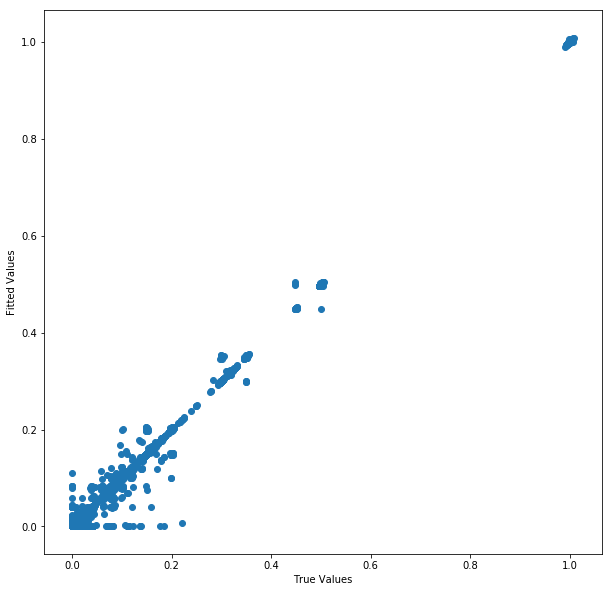

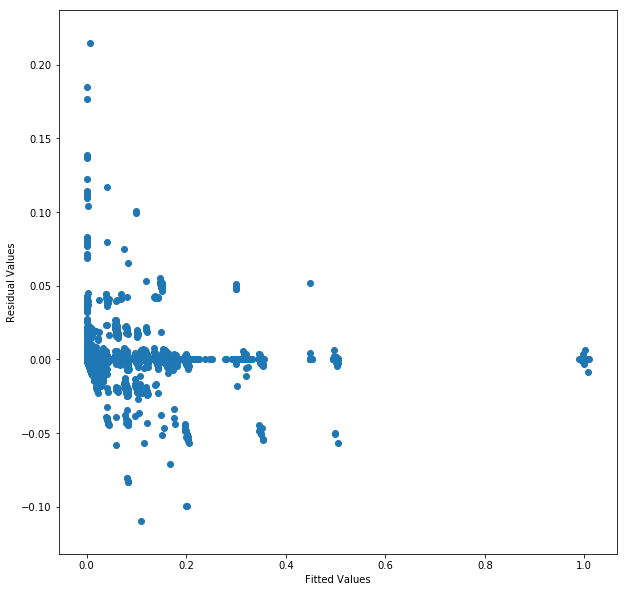

In [253]:
y_whole_predict = knn.predict(X)
plotFitVSTrue(y_whole_predict, y)
plotFitVSResudal(y_whole_predict, y)